In [1]:
#HARSHA - CH.SC.U4CSE23020
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_stata('binary.dta')
print(data.shape)
data.head()

(400, 4)


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [3]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [5]:
x = data.iloc[:,1:]
x.head()

,gre,gpa,rank
0,380.0,3.61,3.0
1,660.0,3.67,3.0
2,800.0,4.00,1.0
3,640.0,3.19,4.0
4,520.0,2.93,4.0


In [6]:
y = data.iloc[:,0]
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: admit, dtype: float32

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 3)

(80, 3)

(320,)

(80,)

In [19]:
model = LogisticRegression(solver='liblinear', max_iter = 1000)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [20]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')

Confusion Matrix :  [[52  2]
 [22  4]]
Accuracy Score :  0.7
Accuracy in Percentage :  70 %


<Axes: xlabel='Predicted', ylabel='Actual'>

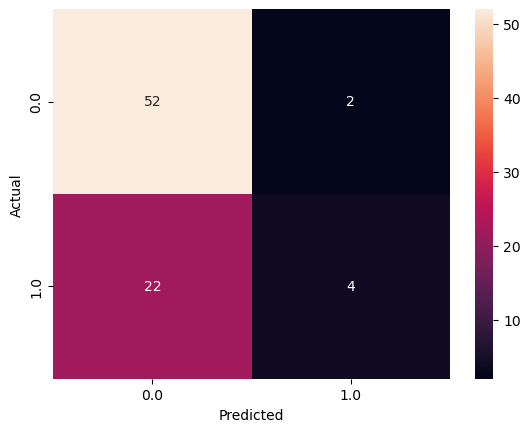

In [21]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)